# Generate the training set with lidar, L and PBand


Generation of the training set for the machine learning algorithm, composed by the lidar, L and PBand

_time 3m_

_Input: AGB vector from N1, raster LVIS from N5_

## 1. Import modules

In [2]:
import plant
import pickle
from os import path
import numpy as np

## 2. Global variables

In [4]:
from config import *

In [3]:
subplot_width_m = 40
subplot_width = subplot_width_m // 20
n_subplots = (5-(subplot_width-1))**2
n_plots = 12

agb_vect = pickle.load(open(file_agb_vector, 'rb'))

## 3. Colocate the lidar with the field data

In [4]:
mean_lvis_vect = np.full((n_subplots, n_plots), np.nan)

for subplot in range(1, n_subplots + 1):
    for plot in range(1, n_plots + 1):
        if plant.isnan(agb_vect[subplot - 1, plot - 1]):
            print(f'sublot {subplot} field plot {plot} is NaN')
            continue
        print(f'processing subplot {subplot} field plot {plot}...')
        plot_number = f'{(plot):02}'
        est_tree_height_file = path.join(field_output_dir,
                                         f'plot_{plot_number}/plot_{plot_number}_s{subplot}_tree_height_field_estimated.bin')
        est_tree_height_file_lvis = path.join(lvis_output_dir, 
                                              f'plot_{plot_number}/plot_{plot_number}_s{subplot}_tree_height_field_lvis.{output_ext}')
        plant.mosaic(lvis_file,
                     bbox_file=est_tree_height_file,
                     output_file=est_tree_height_file_lvis,
                     interp='average',
                     **options)
        mean_lvis_vect[subplot - 1, plot - 1] = plant.plant_info(est_tree_height_file_lvis,
                                                                 data_mean=True,
                                                                 **options).image[0][0]
plant.util(mean_lvis_vect,
           output_file=lvis_zt_m_zg_vect_file,
           **options)

processing subplot 1 field plot 1...
processing subplot 1 field plot 2...
processing subplot 1 field plot 3...
processing subplot 1 field plot 4...
processing subplot 1 field plot 5...
processing subplot 1 field plot 6...
processing subplot 1 field plot 7...
processing subplot 1 field plot 8...
processing subplot 1 field plot 9...
processing subplot 1 field plot 10...
processing subplot 1 field plot 11...
processing subplot 1 field plot 12...
processing subplot 2 field plot 1...
processing subplot 2 field plot 2...
processing subplot 2 field plot 3...
processing subplot 2 field plot 4...
processing subplot 2 field plot 5...
processing subplot 2 field plot 6...
processing subplot 2 field plot 7...
processing subplot 2 field plot 8...
processing subplot 2 field plot 9...
processing subplot 2 field plot 10...
processing subplot 2 field plot 11...
processing subplot 2 field plot 12...
processing subplot 3 field plot 1...
processing subplot 3 field plot 2...
processing subplot 3 field plot 

PlantImage('MEM:140586244343736')

## 4. Visualize the histogram of the data

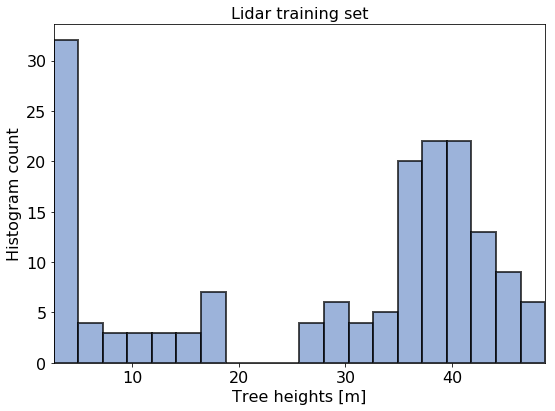

In [7]:
_ = plant.display(lvis_zt_m_zg_vect_file, hist=True, nbins=20, title='Lidar training set', label_x='Tree heights [m]', no_grid=True, **options)

Share the results with the MAAP: LVIS vector